In [1]:
### Audio classification uding ml
###Dataset https://urbansounddataset.weebly.com/download-urbansound8k.html
## Dataset

##The dataset for this project is hosted on [https://urbansounddataset.weebly.com ](https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz). 
##Please download it and place it in the `dataset/` directory.


import requests

def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)  

download_file('https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz', 'dataset.zip')


In [2]:
%pip install librosa
%pip install numpy scipy scikit-learn
%pip install resampy



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import IPython.display as ipd
###display rich media such as audio, video, images, and HTML. 
import librosa 
import librosa.display

In [4]:
import matplotlib.pyplot as plt ###To display the signals the audio
%matplotlib inline
 ### ensure that plots generated by Matplotlib are displayed directly within the notebook cells. 

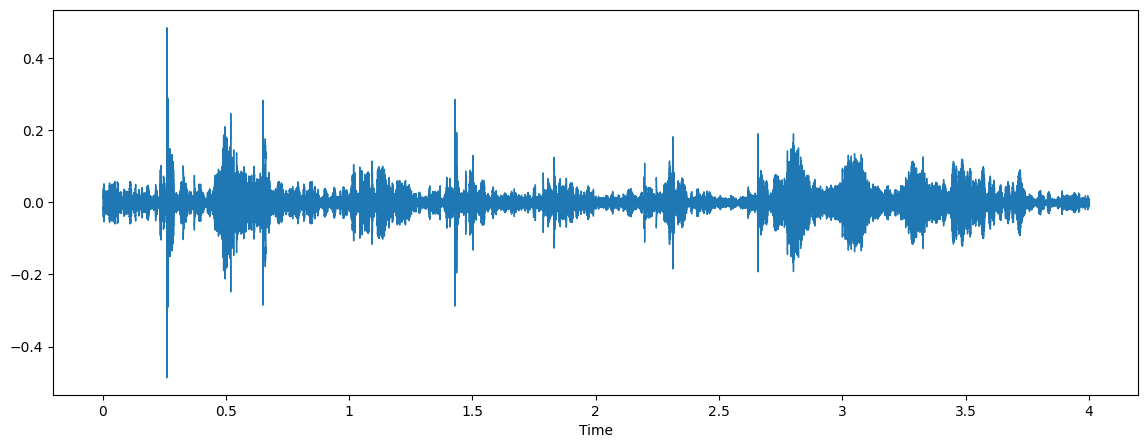

In [21]:
audio_file_path = 'dataset/UrbanSound8K/audio/fold1/203440-3-0-1.wav'
# Create a figure for the plot
plt.figure(figsize=(14,5))

# Load the audio file
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)   # This loads the audio file and returns the audio data and sample rate

# Plot the waveform of the audio file
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)  # Visualizes the waveform of the audio

# Display the audio file in an audio player
ipd.Audio(audio_file_path)  # Allows you to play the audio file directly within the Jupyter notebook

In [22]:
librosa_sample_rate,librosa_audio_data

(22050,
 array([ 3.8333135e-03, -8.3394628e-04, -4.5281844e-03, ...,
        -1.9462581e-03,  7.8653946e-05,  1.0936691e-03], dtype=float32))

In [23]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 


wave_sample_rate
wave_audio



array([[-1049,  1525],
       [-1175,  1291],
       [-1378,  1149],
       ...,
       [  732,  -687],
       [  745,  -677],
       [  724,  -660]], dtype=int16)

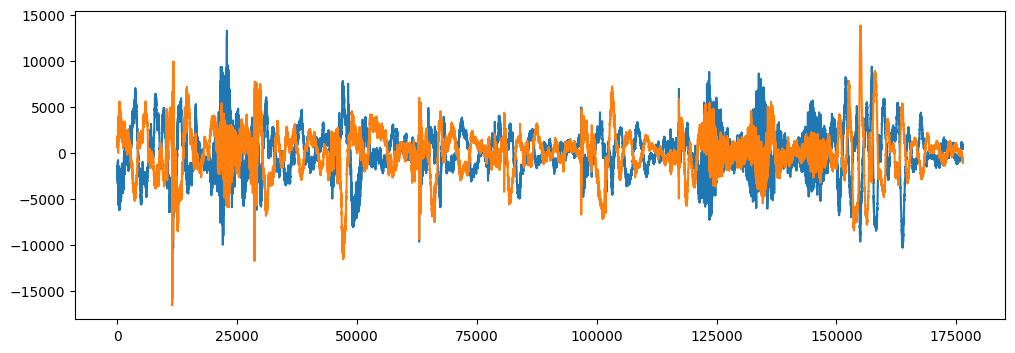

In [24]:


import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)



In [27]:
import pandas as pd
metadata=pd.read_csv('dataset\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [28]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [29]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [30]:
mfccs

array([[-306.23752   , -284.54434   , -292.25735   , ..., -351.75348   ,
        -387.49667   , -418.40936   ],
       [ 114.400185  ,  119.998116  ,  119.058136  , ...,  120.49179   ,
         144.7833    ,  147.37363   ],
       [ -11.007163  ,  -11.270225  ,  -11.641771  , ...,    9.005579  ,
           1.1262805 ,    2.569087  ],
       ...,
       [   6.9435916 ,   11.814399  ,   12.040121  , ...,    9.556379  ,
           9.543237  ,    8.843163  ],
       [  -3.4697344 ,    4.9629636 ,    8.725878  , ...,    9.043329  ,
           8.449483  ,    3.026445  ],
       [  -0.99537295,    6.6447487 ,   12.215414  , ...,    2.362024  ,
           1.7478874 ,   -1.2583821 ]], dtype=float32)

In [31]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import numpy as np



audio_dataset_path='dataset/UrbanSound8K/audio/'
metadata=pd.read_csv('dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [32]:
def features_extractor(audio_file_name):
    audio_file_data, audio_sample_rate = librosa.load(audio_file_name, sr=None)  # Use original sample rate
    mfccs_features = librosa.feature.mfcc(y=audio_file_data, sr=audio_sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features


In [33]:
import librosa


import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    audio_file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    audio_file_data=features_extractor(audio_file_name)
    extracted_features.append([audio_file_data,final_class_labels])



0it [00:00, ?it/s]

2849it [01:03, 52.60it/s]c:\Users\mkuma\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
8732it [03:03, 47.46it/s]


In [34]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-275.91843, 119.49279, -98.21178, -66.51514, ...",dog_bark
1,"[-500.9084, 185.10641, -86.53282, 49.85885, 9....",children_playing
2,"[-531.1953, 186.93994, -70.34916, 40.429245, 9...",children_playing
3,"[-476.78442, 160.33328, -62.952843, 50.75117, ...",children_playing
4,"[-521.2447, 185.39265, -81.95047, 46.47355, 11...",children_playing


In [35]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [36]:
X.shape

(8732, 40)

In [37]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [38]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [39]:
y.shape

(8732, 10)

In [40]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[-1.8378271e+02,  1.5365129e+02, -3.6178787e+01, ...,
         1.0025054e+00, -4.7213894e-01, -1.2038716e+00],
       [-8.4152161e+01,  1.6649818e+02, -6.1209232e+01, ...,
        -4.0521545e+00, -3.3977330e+00, -8.2560587e+00],
       [-6.7970741e+01,  2.6627291e+01, -4.8024197e+01, ...,
        -4.1831975e+00,  2.3861418e+00,  4.4640236e+00],
       ...,
       [-4.7486859e+02,  9.3468300e+01,  3.2284161e+01, ...,
        -1.1071193e+00, -1.5656761e+00, -9.8130512e-01],
       [-2.0102074e+02,  1.7294638e+02, -3.5023716e+01, ...,
         4.1071025e-01, -1.1205076e+00,  4.3810743e-01],
       [-4.8265601e+02,  2.3059308e+02,  2.8331995e+01, ...,
         7.3604614e-01, -1.9397885e+00, -4.5186172e+00]], dtype=float32)

In [42]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [43]:
X_train.shape

(6985, 40)

In [44]:
X_test.shape

(1747, 40)

In [45]:
y_train.shape

(6985, 10)

In [46]:
y_test.shape

(1747, 10)

### 3.MODEL CREATION

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
num_labels = y.shape[1]


In [49]:
model=Sequential()
### INPUT LAYER
model.add(Dense(128,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
### SECOND LAYER (HIDDEN LAYER 1)
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
### THIRD LAYER (HIDDEN LAYER 2)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))

### OUTPUT LAYER
model.add(Dense(num_labels))
model.add(Activation('softmax'))

c:\Users\mkuma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,458 (283.04 KB)

 Trainable params: 72,458 (283.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [52]:
### MODEL TRAINING
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
176/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1409 - loss: 19.0744
Epoch 1: val_loss improved from inf to 2.28564, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1408 - loss: 16.9534 - val_accuracy: 0.1191 - val_loss: 2.2856
Epoch 2/100
193/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1361 - loss: 2.3735
Epoch 2: val_loss improved from 2.28564 to 2.22687, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1362 - loss: 2.3695 - val_accuracy: 0.2106 - val_loss: 2.2269
Epoch 3/100
189/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1465 - loss: 2.2623
Epoch 3: val_loss improved from 2.22687 to 2.13267, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1480 - loss: 2.2600 - val_accuracy: 0.2479 - val_loss: 2.1327
Epoch 4/100
187/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [53]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8677733540534973
